# Transformada de Fourier Discreta


El cálculo de la transformada de Fourier discreta se realiza como:

$$f_n=\frac{n}{N\Delta},  n=\frac{-N}{2}, \dots, \frac{N}{2}$$

La frecuencia va en pasos de 1/T donde T es la duración del registro de la señal.

Aproximando la integral por la suma se tiene:



$$H(f_n)=\int_{-\infty}^{\infty} h(t)e^{-i2\pi f_n t}dt$$



$$H(f_n)\approx  \sum_{k=0}^{N-1}h[k]e^{-i2\pi f[n] t[k] }\Delta $$



$$H(f_n)\approx  \sum_{k=0}^{N-1}h[k]e^{-i2\pi \frac{n}{N\Delta} \Delta * k }\Delta $$



$$H(f_n)\approx \Delta \sum_{k=0}^{N-1}h[k]e^{-i2\pi kn/N } $$


Normalizando la transformada (multiplicando por $1/( \Delta N)$), queda finalmente como:


$$H(f_n)\approx \frac{1}{N} \sum_{k=0}^{N-1}h[k]e^{-i2\pi kn/N } $$


In [1]:
#Bloque 0 ---carga librerías
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from scipy import fft
import scipy.signal as sn


def DFT(senal):                     # Función para calcular la transformada de Fourier de una señal real
    n=len(senal)                    # Longitud que tendrá la señal
    signalX=np.zeros((n, 1), dtype=np.float32)
    FourierTime=np.arange(0, n, 1)/n
    for fi in range(n):
        csw=np.exp(-1j*2*pi*(fi)*FourierTime)
        signalX[fi]=np.sum(csw.real*senal)/n
    return signalX

In [2]:
#help(fft.fftshift)
#help(fft.fftfreq)

3.0


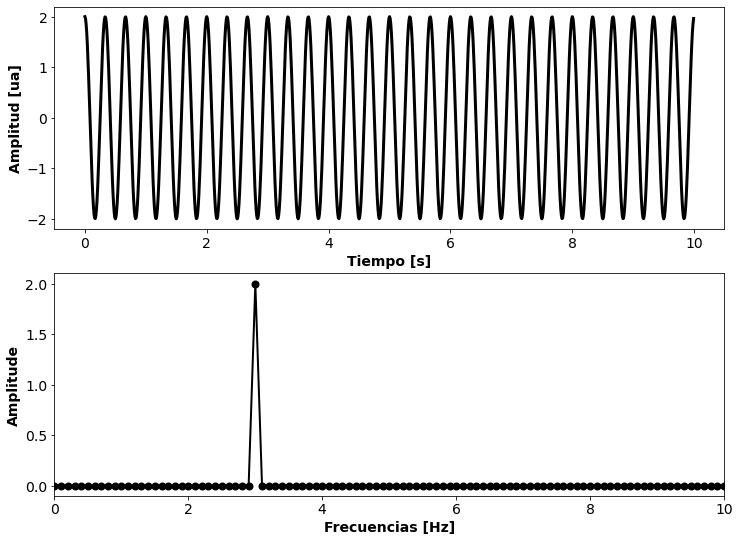

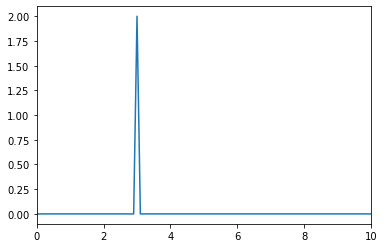

In [6]:
# Creación de la señal artificial
srate=100                                                 # Frecuencia de muestreo
t = np.arange(0, 10 , 1/srate)                # Vector de tiempo en segundos
n=len(t)                                                    # Número total de datos
f=3                                                            # Frecuencia en Hz
w=f*2*pi                                                  # Frecuencia angular
senal=2*np.sin(w*t + pi/2)                   # Señal creada
nyquistfreq=srate/2                               # Frecuencia de Nyquist

senalFFT=DFT(senal)                              # Cálculo de la transformada discreta de Fourier
freqs=np.linspace(0, nyquistfreq, np.int(n/2) + 1)

# Creación de la figura
fig, ax=plt.subplots(2, 1, figsize=(12, 9))
ax[0].plot(t, senal, c="k", lw=3)
ax[1].plot(freqs[:], 2*np.abs(senalFFT[0: len(freqs)]), c="k", lw=2)
ax[1].scatter(freqs[:], 2*np.abs(senalFFT[0: len(freqs)]), c="k", lw=2)
ax[0].set_xlabel("Tiempo [s]", fontsize=14, fontweight="bold")
ax[0].set_ylabel("Amplitud [ua]", fontsize=14, fontweight="bold")
ax[1].set_xlabel("Frecuencias [Hz]", fontsize=14, fontweight="bold")
ax[1].set_ylabel("Amplitude", fontsize=14, fontweight="bold")
ax[1].set_xlim(0, 10)
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)



senalX=fft.rfft(senal)
plt.figure()
freqs=np.linspace(0, nyquistfreq, n//2 +1)
plt.plot(freqs, 2*np.abs(senalX/n)**2)
plt.xlim([0, 10])
print(freqs[np.argmax(senalX)])


In [ ]:
n

Sin embargo, **esta** transformada es **muy cara computacionalmente** hablando de modo que lo que una **alternativa** es el uso de la  **transformada rápida de Fourier**

La transformada rápida de Fourier está ya programada e implementada en el paquete **fft de scipy**

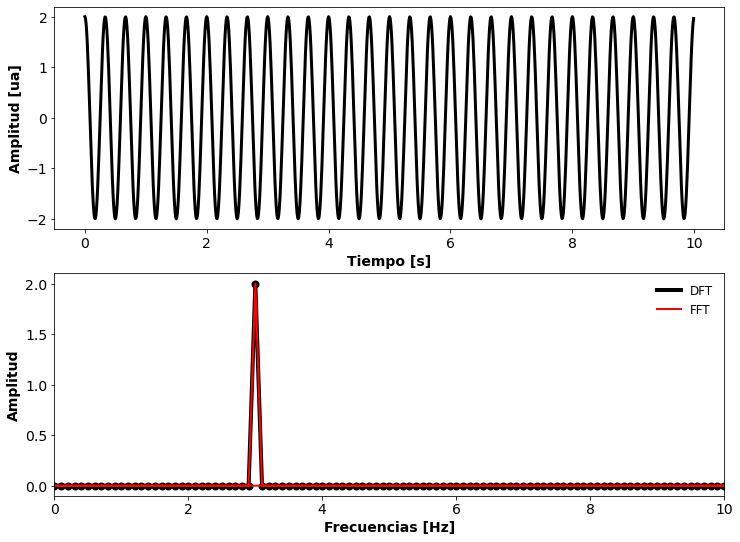

In [7]:
# Transformada rápida de Fourier calculada con scipy
freqsfft=fft.fftfreq(n, t[1]-t[0]) 
y_fft=fft.fft(senal)


# Creación de la figura para comparar
fig, ax=plt.subplots(2, 1, figsize=(12, 9))
ax[0].plot(t, senal, c="k", lw=3)
ax[1].plot(freqs[:], 2*np.abs(senalFFT[0: len(freqs)]), c="k", lw=4, label="DFT")
ax[1].plot(freqsfft, 2*np.abs(y_fft)/n, c="r", lw=2, label="FFT")
ax[1].scatter(freqs[:], 2*np.abs(senalFFT[0: len(freqs)]), c="k", lw=2)
ax[0].set_xlabel("Tiempo [s]", fontsize=14, fontweight="bold")
ax[0].set_ylabel("Amplitud [ua]", fontsize=14, fontweight="bold")
ax[1].set_xlabel("Frecuencias [Hz]", fontsize=14, fontweight="bold")
ax[1].set_ylabel("Amplitud", fontsize=14, fontweight="bold")
ax[1].set_xlim(0, 10)
ax[1].legend(loc="best", frameon=False, fontsize=12)
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)


**Nótese que los resultados son equivalentes en ambos casos**

In [9]:
print("-------------------------------- \n El tiempo de cálculo de la DFT es: ")
%time DFT(senal) 
print("\n --------------------------------\n El tiempo de cálculo de la FFT es: ")
%time p=fft.fft(senal)
del(p)

-------------------------------- 
 El tiempo de cálculo de la DFT es: 
CPU times: user 50.3 ms, sys: 5.81 ms, total: 56.1 ms
Wall time: 56.9 ms

 --------------------------------
 El tiempo de cálculo de la FFT es: 
CPU times: user 456 µs, sys: 156 µs, total: 612 µs
Wall time: 488 µs


**¡Note que hay cerca de tres órdenes de magnitud en la velocidad!**

# Teorema de Muestreo de Nyquist


Para todo intervalo $\Delta$, existe una frecuencia $f_c$ llamada ***frecuencia crítica de Nyquist*** o simplemente **frecuencia de Nyquist** dada por: 

$
    f_c =\frac{1}{2\Delta}.
$


Si una función continua $h(t)$, muestreada a un intervalo $\Delta$, tiene un límite de banda menor que $f_c$, entonces la función $h(t)$ está completamente determinada por sus muestras $h_n$.

Por otro lado, si no es menor que $f_c$, entonces se produce un fenómoeno coonocido como *aliasing*, el cual consiste de una falsa traducción de la señal continua a l caso discreto.


En otras palabras, la frecuencia de Nyquist es la frecuencia más alta que es posible observar en los datos. Para ilustrar esto consideremos la simulación en la siguiente celda.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from ipywidgets import interact
def signal(f0):
    t=np.arange(0, 3.05, 1/1000)
    y=np.sin(2*pi*f0*t)
    return t, y
def signalD(f, f0):
    t2=np.arange(0, 3.05, 1/f)
    y=np.sin(2*pi*f0*t2)
    return t2, y    


def muestreo(fmuestreo=1.5, f0=3):
    t1, y1=signal(f0)
    t2, y2=signalD(fmuestreo, f0)
    plt.figure(1, figsize=(15, 9))
    plt.plot(t1, y1, c="black", linestyle="--", linewidth=2, label="Señal analógica")
    plt.scatter(t2, y2, c="gray", s=75, label="Muestreo")
    plt.plot(t2, y2, c="gray", lw=2)
    plt.legend(loc="best", frameon=False, fontsize=16)
    plt.xlabel("Time [ms]", fontweight="bold", fontsize=16)
    plt.ylabel("Kernel contribution", fontweight="bold", fontsize=16)
    plt.xlim([0, 3.8])
    plt.text(3.2, 0.7, "$f_c=$%d"%(f0*2), fontsize=16)
    plt.show()

In [2]:
interact(muestreo, 
         fmuestreo=(1, 10, 0.1), 
         f0=(2, 4),
         )

interactive(children=(FloatSlider(value=1.5, description='fmuestreo', max=10.0, min=1.0), IntSlider(value=3, d…

<function __main__.muestreo(fmuestreo=1.5, f0=3)>

¿Qué nos dice la transformada de Fourier?
Cada coeficiente de la transformada es proporcional a la fuente con esa frecuencia.

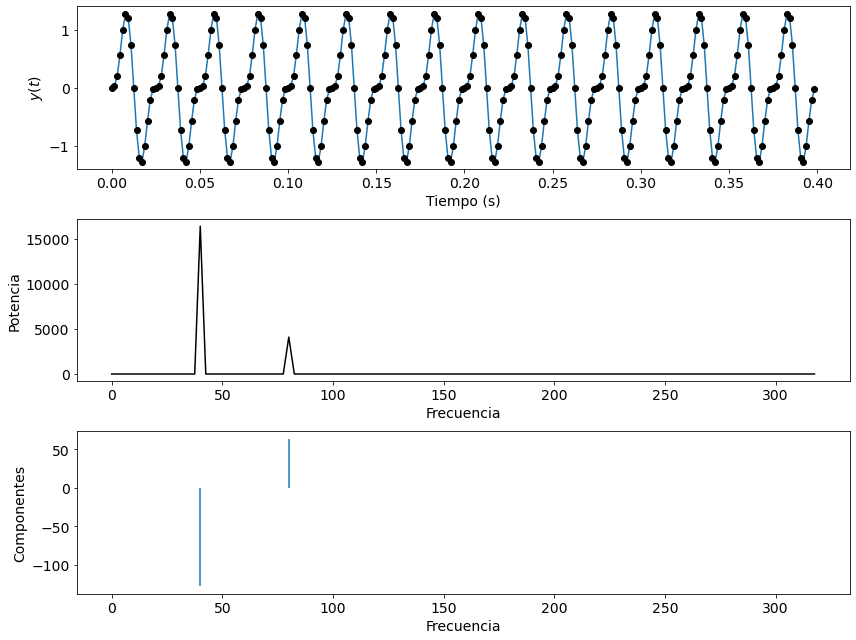

In [13]:
#------------------------ Bloque I -------------------------------------------
n = 2 ** 8  # Número de datos
f = 40.0  # Hz
dt = 1 / (f *16)  # Frecuencia de muestreo
t = np.linspace(0, (n - 1) * dt, n)  # Intervalo de tiempo en segundos
w=2*pi*f
y = np.sin( w * t) - 0.5 * np.sin(2*w * t)  # Señal
fig, ax=plt.subplots(3, 1, figsize=(12, 9))
ax[0].plot(t, y)
ax[0].plot(t, y, 'ko')
ax[0].set_xlabel('Tiempo (s)', fontsize=14)
ax[0].set_ylabel('$y(t)$', fontsize=14)
# Cálculo de la transformada rápida de Fourier
freqs=fft.fftfreq(n, dt) 
y_fft=fft.fft(y)
select=np.where(freqs>=0)
power=(abs(y_fft)**2)
ax[1].plot(freqs[select], power[select], c='k')
ax[1].set_ylabel('Potencia', fontsize=14)
ax[1].set_xlabel('Frecuencia', fontsize=14)
ax[2].vlines(freqs[select], 0, y_fft[select].imag)
ax[2].set_xlabel('Frecuencia', fontsize=14)
ax[2].set_ylabel('Componentes', fontsize=14)
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)
fig.tight_layout()


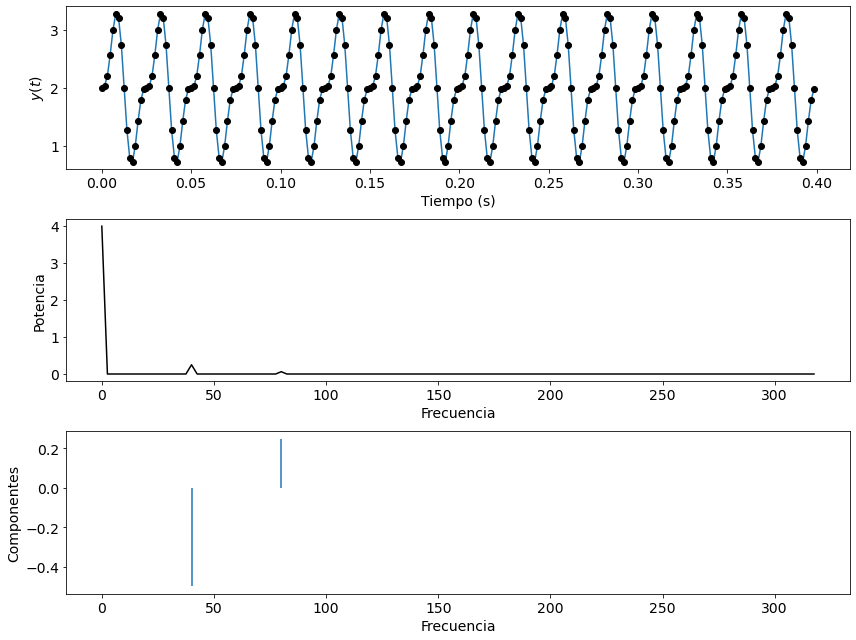

In [14]:
#------------------------ Bloque I -------------------------------------------
n = 2 ** 8  # Número de datos
f = 40.0  # Hz
dt = 1 / (f *16)  # Frecuencia de muestreo
t = np.linspace(0, (n - 1) * dt, n)  # Intervalo de tiempo en segundos
w=2*pi*f
y = 2+np.sin( w * t) - 0.5 * np.sin(2*w * t)  # Señal
fig, ax=plt.subplots(3, 1, figsize=(12, 9))
ax[0].plot(t, y)
ax[0].plot(t, y, 'ko')
ax[0].set_xlabel('Tiempo (s)', fontsize=14)
ax[0].set_ylabel('$y(t)$', fontsize=14)
# Cálculo de la transformada rápida de Fourier
freqs=fft.fftfreq(n, dt) 
y_fft=fft.fft(y)/n
select=np.where(freqs>=0)
power=(abs(y_fft)**2)
ax[1].plot(freqs[select], power[select], c='k')
ax[1].set_ylabel('Potencia', fontsize=14)
ax[1].set_xlabel('Frecuencia', fontsize=14)
ax[2].vlines(freqs[select], 0, y_fft[select].imag)
ax[2].set_xlabel('Frecuencia', fontsize=14)
ax[2].set_ylabel('Componentes', fontsize=14)
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)
fig.tight_layout()

¿Qué pasó?


Ahora hagamos nuevamente el ejercicio anterior pero restando la media de la señal

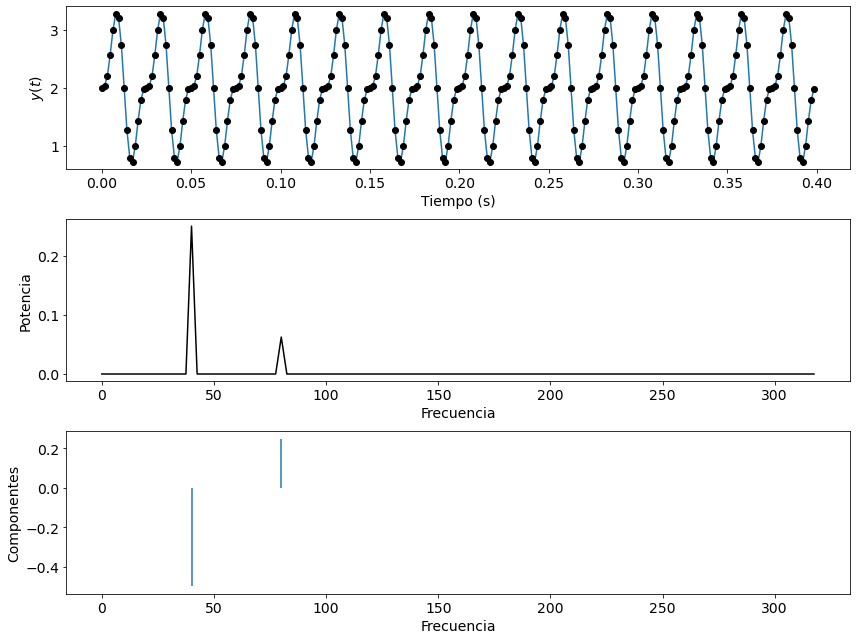

In [15]:
#------------------------ Bloque I -------------------------------------------
n = 2 ** 8  # Número de datos
f = 40.0  # Hz
dt = 1 / (f *16)  # Frecuencia de muestreo
t = np.linspace(0, (n - 1) * dt, n)  # Intervalo de tiempo en segundos
w=2*pi*f
y = 2+np.sin( w * t) - 0.5 * np.sin(2*w * t)  # Señal
fig, ax=plt.subplots(3, 1, figsize=(12, 9))
ax[0].plot(t, y)
ax[0].plot(t, y, 'ko')
ax[0].set_xlabel('Tiempo (s)', fontsize=14)
ax[0].set_ylabel('$y(t)$', fontsize=14)
# Cálculo de la transformada rápida de Fourier
freqs=fft.fftfreq(n, dt) 
y=y-np.mean(y)
y_fft=fft.fft(y)/n
select=np.where(freqs>=0)
power=(abs(y_fft)**2)
ax[1].plot(freqs[select], power[select], c='k')
ax[1].set_ylabel('Potencia', fontsize=14)
ax[1].set_xlabel('Frecuencia', fontsize=14)
ax[2].vlines(freqs[select], 0, y_fft[select].imag)
ax[2].set_xlabel('Frecuencia', fontsize=14)
ax[2].set_ylabel('Componentes', fontsize=14)
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)
fig.tight_layout()

**Note cómo ya se ha recuperado el resultado original**

## Señal senoidal con múltiples frecuencias y ruido

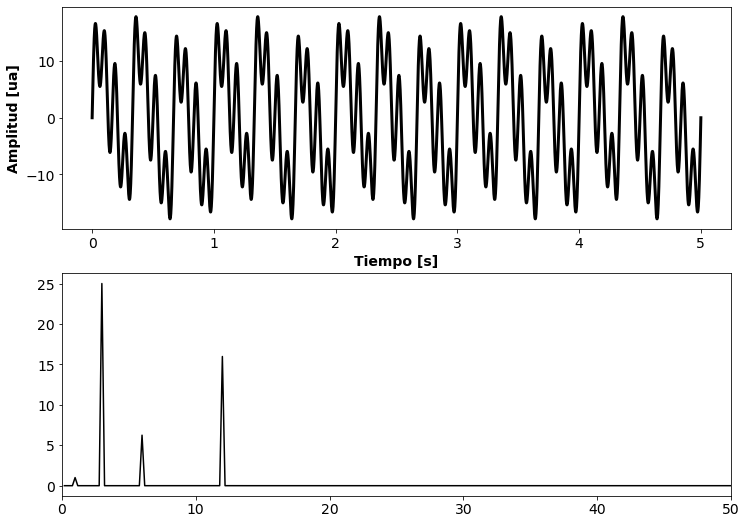

In [16]:
# Creación de la señal artificial
srate=1000                                              # Frecuencia de muestreo
t = np.arange(0, 5+1/srate , 1/srate)                # Vector de tiempo en segundos
n=len(t)                                                    # Número total de datos
f=(3.0, 1.0, 6.0, 12.0)                                           # Frecuencias a utilizar
a=(10.0, 2.0, 5.0, 8.0)                                          # Amplitudes para cada frecuencia
senal=np.zeros((n), dtype=np.float64)                           # Crea el vector para almacenar la señal
nyquistfreq=srate/2                               # Frecuencia de Nyquist

for i in range(len(f)):
    senal=senal + a[i]*np.sin(2*pi*f[i]*t)

fig, ax=plt.subplots(2, 1, figsize=(12, 9))
ax[0].plot(t, senal, c="black", lw=3)    
ax[0].set_xlabel("Tiempo [s]", fontsize=14, fontweight="bold")
ax[0].set_ylabel("Amplitud [ua]", fontsize=14, fontweight="bold")
# Cálculo de la transformada de Fourier
freqs=fft.fftfreq(n, 1/srate)
senalfft=fft.fft(senal)/n
select=np.where(freqs>0)
power=(abs(senalfft)**2)
ax[1].plot(freqs[select],  power[select], c='k')
ax[1].set_xlim([0, 50])
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)

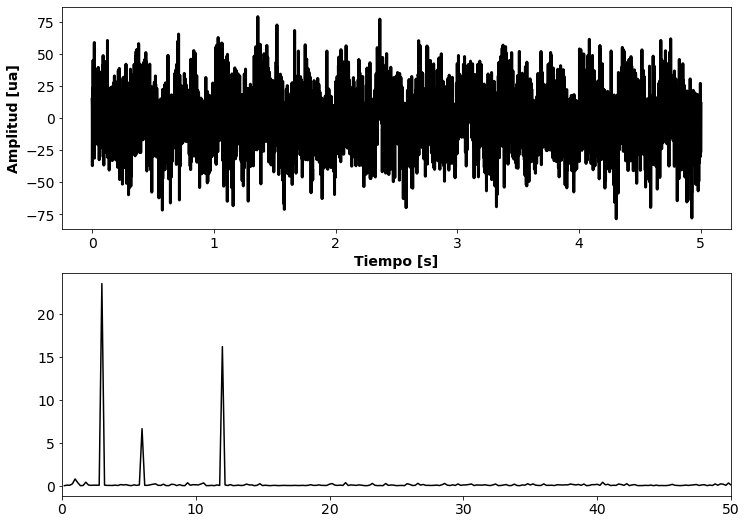

In [17]:
#Ahora agreguemos el ruido
senal=senal + np.random.randn(len(senal))*20   #Se ha agregado ruido blanco (distribución gaussiana) con sigma =20 y mu=0


fig, ax=plt.subplots(2, 1, figsize=(12, 9))
ax[0].plot(t, senal, c="black", lw=3)    
ax[0].set_xlabel("Tiempo [s]", fontsize=14, fontweight="bold")
ax[0].set_ylabel("Amplitud [ua]", fontsize=14, fontweight="bold")
# Cálculo de la transformada de Fourier
freqs=fft.fftfreq(n, 1/srate)
senalfft=fft.fft(senal)/n
select=np.where(freqs>0)
power=(abs(senalfft)**2)
ax[1].plot(freqs[select],  power[select], c='k')
ax[1].set_xlim([0, 50])

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)

Note como las componentes en frecuencia no se vieron afectadas aún cuando la señal en su amplitud ha sido fuertemente distorsionada

## Transformada de Fourier de señales senoidales no estacionarias

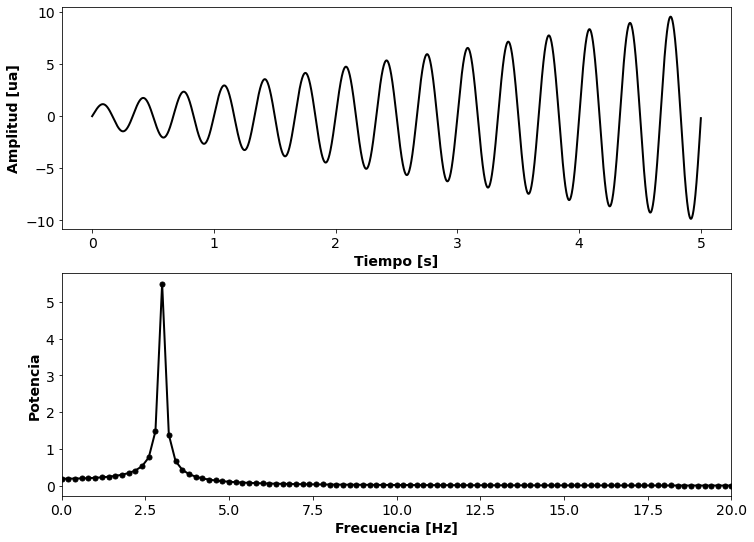

In [18]:
srate=1000                              # Frecuencia de muestreo.
t=np.arange(0, 5, 1/srate)     # Vector de tiempo.
n=len(t)                                    # Longitud del vector de tiempo.
f=3                                            # Frecuencia en Hz.
swave=np.linspace(1, 10, n)*np.sin(2*pi*f*t)        #Generación de la señal
swaveFFT=fft.fft(swave)/n
freqs=np.linspace(0, srate/2, np.int(n/2) + 1)
fig, ax=plt.subplots(2, 1, figsize=(12, 9 ))
ax[0].plot(t, swave, c="k", lw=2)
ax[0].set_xlabel("Tiempo [s]", fontsize=14, fontweight="bold")
ax[0].set_ylabel("Amplitud [ua]", fontsize=14, fontweight="bold")
ax[1].plot(freqs, 2*abs(swaveFFT[0:len(freqs)]), c="black", lw=2)
ax[1].scatter(freqs, 2*abs(swaveFFT[0:len(freqs)]), c="k", s=25)
ax[1].set_xlabel("Frecuencia [Hz]", fontsize=14, fontweight="bold")
ax[1].set_ylabel("Potencia", fontsize=14, fontweight="bold")
ax[1].set_xlim(0, 20)
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)

**Note como la no estacionaridad ensancha el contenido espectral, creando una "fuga"**

Ahora consideraremos el caso en el que el contenido de la señal además contiene frecuencias que varían en el tiempo

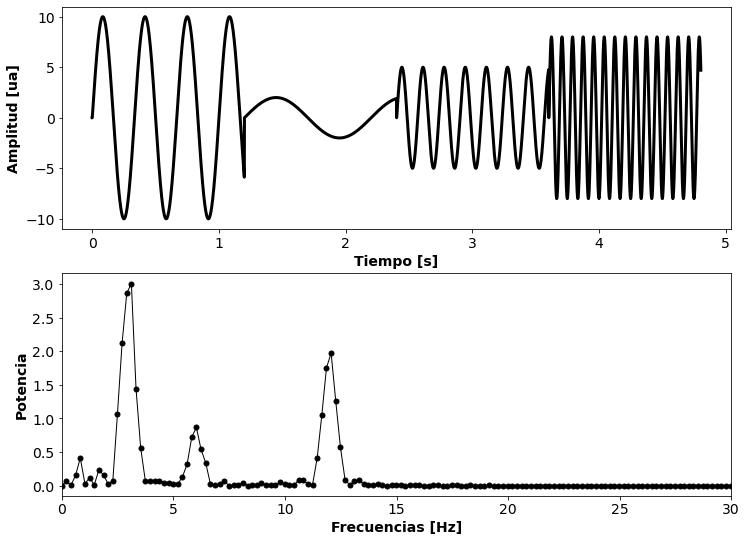

In [19]:
# Creación de la señal artificial
srate=1000                                                              # Frecuencia de muestreo
t = np.arange(0, 1.2+1/srate , 1/srate)                # Vector de tiempo en segundos
f=(3.0, 1.0, 6.0, 12.0)                                              # Frecuencias a utilizar
a=(10.0, 2.0, 5.0, 8.0)                                             # Amplitudes para cada frecuencia
nyquistfreq=srate/2                               # Frecuencia de Nyquist
tchunks=np.round(np.linspace(1, n, len(a) + 1))
senal=np.zeros((1))
for i in range(len(a)):
    senal=np.concatenate((senal, a[i]*np.sin(2*pi*f[i]*t) ), axis=0)
n=len(senal)                                                         # Cálculo del número de elementos de la señal
t=np.arange(0, n/srate, 1/srate)                        # Vector de tiempo actualizado para la señal completa
# Cálculo de la transformada de Fourier
senalfft=fft.fft(senal-np.mean(senal))/n                               # Obtención de la transformada de la señal
freqs=fft.fftfreq(n, 1/srate)                                                       # Generación del vector de frecuencias
select=np.where(freqs>=0)
# Graficación
fig, ax=plt.subplots(2, 1, figsize=(12, 9))
ax[0].plot(t, senal, c="k", lw=3)
ax[1].scatter(freqs[select], 2*np.abs(senalfft[select])**2, c="k", s=25)
ax[1].plot(freqs[select], 2*np.abs(senalfft[select])**2, c="k", lw=1)
ax[0].set_xlabel("Tiempo [s]", fontsize=14, fontweight="bold")
ax[1].set_xlabel("Frecuencias [Hz]", fontsize=14, fontweight="bold")
ax[0].set_ylabel("Amplitud [ua]", fontsize=14, fontweight="bold")
ax[1].set_ylabel("Potencia", fontsize=14, fontweight="bold")
ax[1].set_xlim([0, 30])
ax[0].set_xticks([0, 1, 2, 3, 4, 5])
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)

**Note cómo el espectro se ha ensanchado aún más** además de la aparición de pequeños picos espurios alrededor de los picos originales en 1, 3, 6 y 12.
Una característica importante de las señales no estacionarias es que las frecuencias que las componen está localizadas en el tiempo, note como la transformada de Fourier pierde esta información.

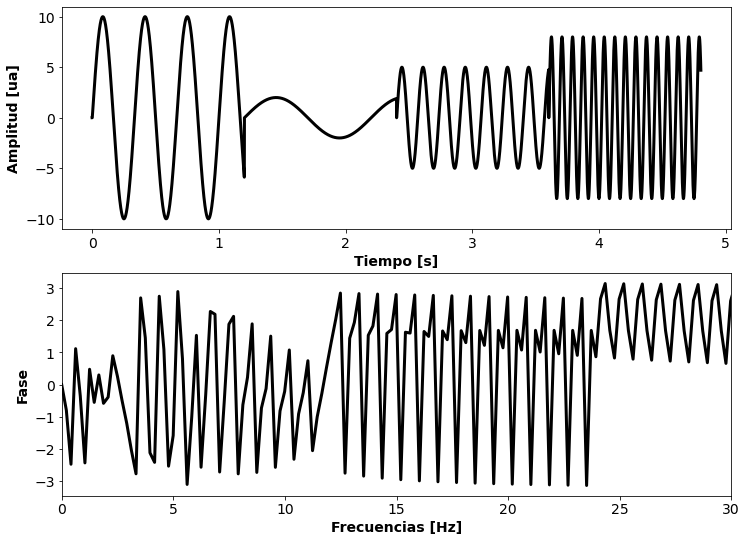

In [20]:
# Graficación
fig, ax=plt.subplots(2, 1, figsize=(12, 9))
ax[0].plot(t, senal, c="k", lw=3)
#ax[1].scatter(freqs[select], 2*np.abs(senalfft[select])**2, c="k", s=25)
ax[1].plot(freqs[select], np.angle(senalfft[select]), c="k", lw=3)
ax[0].set_xlabel("Tiempo [s]", fontsize=14, fontweight="bold")
ax[1].set_xlabel("Frecuencias [Hz]", fontsize=14, fontweight="bold")
ax[0].set_ylabel("Amplitud [ua]", fontsize=14, fontweight="bold")
ax[1].set_ylabel("Fase", fontsize=14, fontweight="bold")
ax[1].set_xlim([0, 30])
ax[0].set_xticks([0, 1, 2, 3, 4, 5])
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)

Note que no es del todo sencillo indicar información temporal a partir de la transformada de Fourier es una de las razones para utilizar la aproximación de los análisis de **tiempo-frecuencia**

Veamos un ejemplo más...

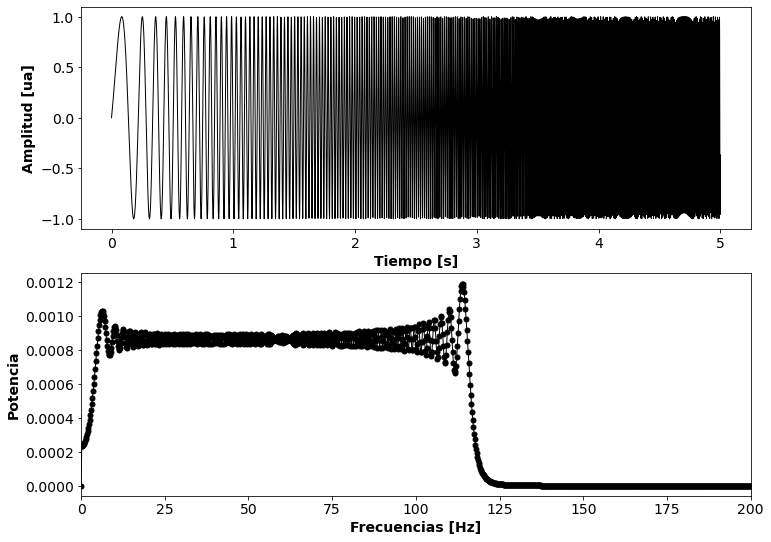

In [21]:
# Creación de la señal artificial
srate=1000                                                              # Frecuencia de muestreo
t = np.arange(0, 5 , 1/srate)                                  # Vector de tiempo en segundos
a=(10.0, 2.0, 5.0, 8.0)                                             # Amplitudes para cada frecuencia
nyquistfreq=srate/2                                               # Frecuencia de Nyquist
f=(2, 10)                                              
n=len(t)
ff=np.linspace(f[0], f[1]*(0.5*f[0] + 0.5*f[1]), n)
senal =np.sin(2*pi*ff*t)                                         # Creación de la señal

# Cálculo de la transformada de Fourier
senalfft=fft.fft(senal-np.mean(senal))/n                               # Obtención de la transformada de la señal
freqs=fft.fftfreq(n, 1/srate)                                                       # Generación del vector de frecuencias
select=np.where(freqs>=0)
# Graficación
fig, ax=plt.subplots(2, 1, figsize=(12, 9))
ax[0].plot(t, senal, c="k", lw=1)
ax[1].scatter(freqs[select], 2*np.abs(senalfft[select])**2, c="k", s=25)
ax[1].plot(freqs[select], 2*np.abs(senalfft[select])**2, c="k", lw=1)
ax[0].set_xlabel("Tiempo [s]", fontsize=14, fontweight="bold")
ax[1].set_xlabel("Frecuencias [Hz]", fontsize=14, fontweight="bold")
ax[0].set_ylabel("Amplitud [ua]", fontsize=14, fontweight="bold")
ax[1].set_ylabel("Potencia", fontsize=14, fontweight="bold")
ax[1].set_xlim([0, 200])
ax[0].set_xticks([0, 1, 2, 3, 4, 5])
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)


Note que nuevamente la señal al o ser estacionaria muestra nuevamente una cantidad difusa de sus componentes.

En resumen:
1. Cuando se tienen picos bien definidas podemos decir que la señal es estacionaria.
2. Cuando las frecuencias muestran mesetas o puntos planos, podemos decir que es no estacionaria en las frecuencias.
3. Cuando hay un ligero ensanchamiento alrededor de los picos de frecuencia podemos decir que hay ligeros cambios en la amplitud de la señal.

## Efectos de frontera 

Hasta ahora hemos trabajado con señales en las que el tiempo de registro abarca prácticamente segmentos de periodo que permiten tener una óptima resolución en el espectro de Fourier, no obstante ¿qué ocurre cuándo no es así?
En las siguientes celdas veremos algunos de estos ejemplos

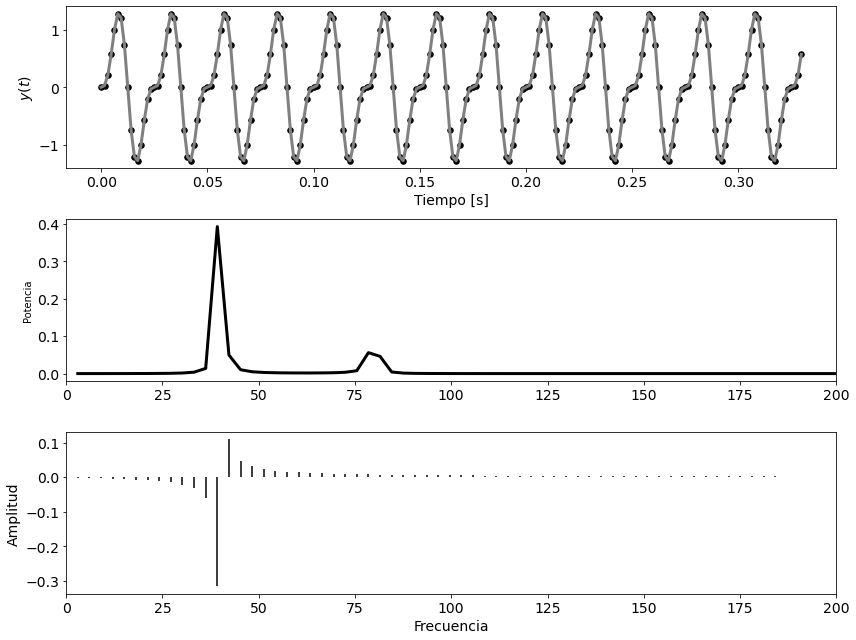

In [22]:
#------------------------ Bloque II -------------------------------------------
n = 2 ** 8-44  # Número de datos
f = 40.0  # Hz
dt = 1 / (f *16)  # Frecuencia de muestreo
w=2*pi*f
t = np.linspace(0, (n-1)*dt, n)  # Intervalo de tiempo en segundos
y = np.sin( w * t) - 0.5 * np.sin(2*w* t)  # Señal
fig, ax=plt.subplots(3, 1, figsize=(12, 9))
ax[0].plot(t, y, c="gray", lw=3)
ax[0].scatter(t, y, c='k', s=30)
ax[0].set_xlabel('Tiempo [s]', fontsize=14)
ax[0].set_ylabel('$y(t)$', fontsize=14)

freqs=fft.fftfreq(n, dt) 
y_fft=fft.fft(y)/n
select=np.where(freqs>0)
power=2*(abs(y_fft)**2)
ax[1].plot(freqs[select], power[select], c="k", lw=3)
ax[1].set_ylabel('Potencia')
ax[1].set_xlim([0, 200])

ax[2].vlines(freqs[select], 0, y_fft[select].imag, color="k")
ax[2].set_xlabel('Frecuencia', fontsize=14)
ax[2].set_ylabel('Amplitud', fontsize=14)

ax[2].set_xlim([0, 200])
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)

fig.tight_layout()

Note cómo hay un ensanchamiento de os picos, a esto se le conoce como fuga espectral y es causada por la discontinuidad presente en los extremos de la señal (vea la presentación para una figura demostrativa). 

Una de las primeras ventanas que usaremos es la ventana de hamming o también llamada ventana de Hann.

# Ventaneo o uso de tapers

Un taper o ventana es una función que permite reducir los efectos de fuga y mejorar la estimación del espectro de una señal. 

Hasta ahora hemos trabajado con señales simuladas donde ya nos hemos topado con la necesidad de un método para la estimación de la frecuencia. Sin embarglo los tapers o ventanas aparecen en el día a día del procesamiento de señales reales.

## Transformada de Fourier en señales reales


Cuando se tienen señales reales, el no usar taper alguno equivale siempre a usar un taper cuadrado. La figura a continuación nos muestra este hecho debido a que cuando se tiene encendido el aprato de registro la ventana tiene valor de 1 y cuando se apaga tiene un valor de cero.

Vea la presentación de la clase para notar los efectos de no realizar ningún taper.


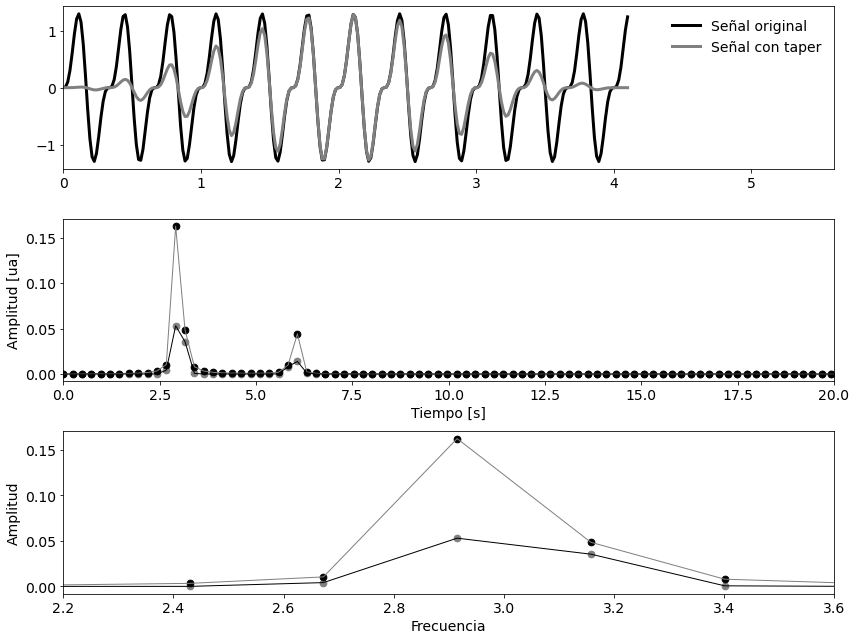

In [23]:
n= 2 ** 8
f=3
t= np.linspace(0, 4.1, n)
dt = t[1] - t[0]
y = np.sin(2 * pi * f * t) - 0.5 * np.sin(2 * pi * 2 * f * t)
ytap = y * np.hanning(n)
ytapfft = fft.fft(ytap-np.mean(ytap)) /n
yfft = fft.fft(y-np.mean(y)) /n
freqs = fft.fftfreq(n, dt)
segment=np.where(freqs>=0)


fig, axes=plt.subplots(3, 1, figsize=(12, 9))
axes[0].plot(t,  y,  c="k", lw=3, label="Señal original")
axes[0].plot(t, ytap, c="gray", lw=3, label="Señal con taper")
axes[1].scatter(freqs[segment], (np.abs(ytapfft)**2)[segment], color="gray", s=45)
axes[1].plot(freqs[segment],(np.abs(yfft)**2)[segment], color="gray", lw=1)
axes[1].scatter(freqs[segment], (np.abs(yfft)**2)[segment], color="k", s=45)
axes[1].plot(freqs[segment],(np.abs(ytapfft)**2)[segment], color="k", lw=1)
axes[0].set_xlim([0, 5.6])
axes[0].legend(loc="best", frameon=False, fontsize=14)
axes[2].scatter(freqs[segment], (np.abs(ytapfft)**2)[segment], color="gray", s=45)
axes[2].plot(freqs[segment],(np.abs(yfft)**2)[segment], color="gray", lw=1)
axes[2].scatter(freqs[segment], (np.abs(yfft)**2)[segment], color="k", s=45)
axes[2].plot(freqs[segment],(np.abs(ytapfft)**2)[segment], color="k", lw=1)
axes[2].set_xlim([2.2, 3.6])

axes[2].set_xlabel('Frecuencia', fontsize=14)
axes[2].set_ylabel('Amplitud', fontsize=14)
axes[1].set_xlabel('Frecuencia', fontsize=14)
axes[1].set_ylabel('Amplitud', fontsize=14)
axes[1].set_xlabel('Tiempo [s]', fontsize=14)
axes[1].set_ylabel('Amplitud [ua]', fontsize=14)
axes[1].set_xlim([0, 20])
axes[0].tick_params(labelsize=14)
axes[1].tick_params(labelsize=14)
axes[2].tick_params(labelsize=14)
fig.tight_layout()

## ¿Es necesario hacer un ventaneo o tapering?

La respuesta a esta pregunta depende del propósito del cómputo de la transformada de Fourier. Si el objetivo  es medir el pico de potencia a una frecuencia específica de manera precisa, el uso de la ventana va a reducir la precisión de la estimación en la potencia. Por otra parte, si la forma de la respuesta en frecuencia es lo que interesa, entonces el uso de tapers incrementará la precisión de los resultados con un amortiguamiento en los artefactos de frontera.

# Método de ventanas múltiples con secuencias slepianas
A continuación presentamos el métod multitaper propuesto por Thomson



Este método consiste en usar varias ventanas ortogonales que minimizan la fuga espectral.




In [2]:
from scipy.signal.windows import dpss
dpss?

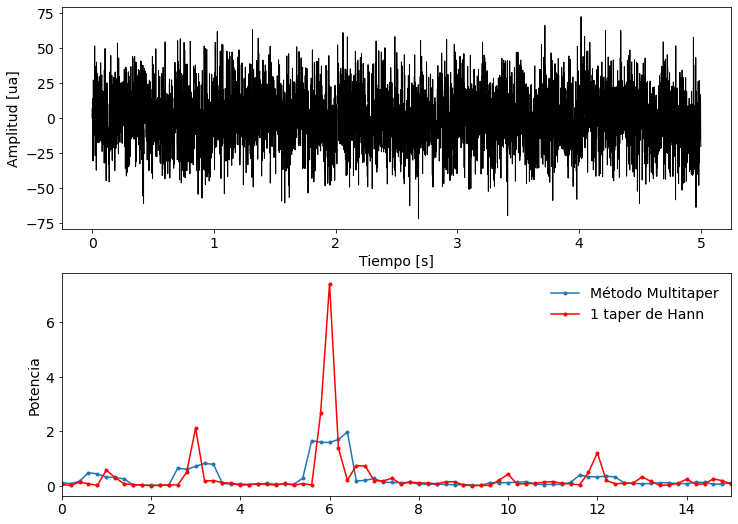

In [309]:
srate = 1000          # Frecuencia de muestreo
t = np.arange(0, 5, 1/srate)      # Vector de tiempos
n = len(t);        # Número de elementos en la señal

noisefactor = 20;     # Factor de ruido

# Generación de una señal con múltiples frecuencias
a = (2, 3, 4, 2)
f = (1, 3, 6, 12)
data=np.zeros((len(t)))
for i in range(len(a)):
    data[:] +=a[i]*np.sin(2*pi*f[i]*t)
data[:]+= noisefactor*np.random.randn(len(data))

# Creación de la función del cálculo de la transformada rápida con el uso de multitapers slepianos
def fftmultitaper(data, srate, bw):
    from scipy.signal.windows import dpss
    # define Slepian tapers.
    n=len(data)
    ntap=bw*2-1
    tapers = dpss(n, bw, ntap)
    # initialize multitaper power matrix
    mtPow = np.zeros((n//2+1))
    hz = np.linspace(0,srate/2, n//2+1);

    # loop through tapers
    for tapi in range (np.size(tapers,axis=0)-1):# % -1 because the last taper is typically not used

        # scale the taper for interpretable FFT result
        temptaper = tapers[tapi,:]/np.max(tapers[tapi,:]);

        # FFT of tapered data
        x = abs(2*fft.fft(data*temptaper)/n)**2;

        # add this spectral estimate to the total power estimate
        mtPow[:]+= x[0:len(hz)]
    # Because the power spectra were summed over many tapers,
    # divide by the number of tapers to get the average.
    return mtPow[:]/ntap






hz = np.linspace(0,srate/2,n//2+1);         # Generación de las frecuencias


fig, ax=plt.subplots(2,1, figsize=(12, 9))

ax[0].plot(t, data, "k", lw=1)
ax[0].set_xlabel("Tiempo [s]", fontsize=14);
ax[0].set_ylabel("Amplitud [ua]", fontsize=14)

mtPow=fftmultitaper(data, srate, 3);
  
# now compute the 'normal' power spectra using one taper
hann   = .5*(1-np.cos(2*pi*np.arange(1, n+1)/(n-1)));
x      = abs(2*fft.fft(data*hann)/n)**2;
regPow = x[0:len(hz)]; # regPow = regular power
# Now plot both power spectra. Note that power is plotted here instead of
# amplitude because of the amount of noise. Try plotting amplitude by
# multiplying the FFT result by 2 instead of squaring.
ax[1].plot(hz,mtPow,'.-', label="Método Multitaper")
ax[1].plot(hz,regPow,'r.-', label="1 taper de Hann")
ax[1].set_xlim([0, 15])
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[1].set_ylabel("Potencia", fontsize=14)
ax[1].legend(loc="best", frameon=False, fontsize=14)

Generemos primero una señal como un proceso autoregresivo de orden 4:

$$ x(t)=ax(t-1) + bx(t-2) + cx(t-3) + dx(t-4) + \epsilon(t) $$

con las constantes:

a=2.7607
b=-3.8106
c=2.6535
d=-0.9238

y $\epsilon$ es ruido blanco 



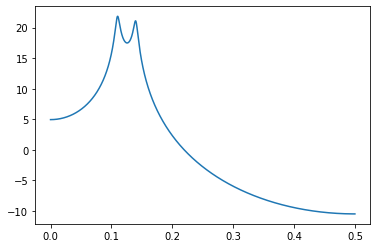

In [331]:
## Obtención del espectro de la señal teóricamente
# constants of AR(4) in Eq. (8.15)
a=2.7607
b=-3.8106
c=2.6535
d=-.9238
dt=1/fsamp
w=np.linspace(0, np.pi*fsamp, n//2+1)
f=w/(2*np.pi/dt);
z=np.exp(-1j*w*dt);
# time step set to 1
# scale for frequency
# frequency scaled between 0 and 0.5 (for plot)
# zˆ(-1)
X=1/(1-a*z-b*z**2-c*z**3-d*z**4);
PX=np.abs(X);
LPX=10*np.log10(PX);
# Fourier transform
# Power
# Power in dB
plt.plot(f, LPX)
def fftmultitaper(data, srate, bw):
    from scipy.signal.windows import dpss
    # define Slepian tapers.
    n=len(data)
    ntap=bw*2-1
    tapers = dpss(n, bw, ntap)
    # initialize multitaper power matrix
    mtPow = np.zeros((n//2+1))
    hz = np.linspace(0,srate/2, n//2+1);

    # loop through tapers
    for tapi in range (np.size(tapers,axis=0)-1):# % -1 because the last taper is typically not used

        # scale the taper for interpretable FFT result
        temptaper = tapers[tapi,:]/np.max(tapers[tapi,:]);

        # FFT of tapered data
        x = abs(2*fft.fft(data*temptaper)/n)**2;

        # add this spectral estimate to the total power estimate
        mtPow[:]+= x[0:len(hz)]
    # Because the power spectra were summed over many tapers,
    # divide by the number of tapers to get the average.
    return mtPow[:]/ntap

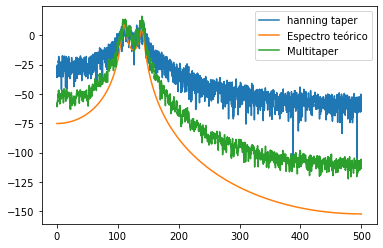

In [332]:
def fftmultitaper(data, srate, bw):
    from scipy.signal.windows import dpss
    # define Slepian tapers.
    n=len(data)
    ntap=bw*2-1
    tapers = dpss(n, bw, ntap)
    # initialize multitaper power matrix
    mtPow = np.zeros((n//2+1))
    hz = np.linspace(0,srate/2, n//2+1);

    # loop through tapers
    for tapi in range (np.size(tapers,axis=0)-1):# % -1 because the last taper is typically not used

        # scale the taper for interpretable FFT result
        temptaper = tapers[tapi,:]/np.max(tapers[tapi,:]);

        # FFT of tapered data
        x = abs(2*fft.fft(data*temptaper)/n)**2;

        # add this spectral estimate to the total power estimate
        mtPow[:]+= x[0:len(hz)]
    # Because the power spectra were summed over many tapers,
    # divide by the number of tapers to get the average.
    return mtPow[:]/ntap


#n=1000
senal=np.zeros((n), dtype=np.float32)
#Inicialización
senal[0]=1 
senal[1]=1.2
senal[2]=1.4
senal[3]=1.6
coef=(2.7607, -3.8106, 2.6535, -0.9238)  #Coeficientes a-d

for i in range(4, n):
    senal[i]=coef[0]*senal[i-1] + coef[1]*senal[i-2] + coef[2]*senal[i-3] + coef[3]*senal[i-4] + np.random.normal(size=1)
    
#plt.plot(t, senal)

senalX=fft.rfft((senal-np.mean(senal))*np.hanning(n))
f=np.linspace(0, fsamp/2, n//2 +1)
plt.plot(f, 10*np.log10(np.abs(2*senalX/n)**2), label="hanning taper")
plt.plot(f,  5*LPX-100, label="Espectro teórico")
snalX=fftmultitaper(senal-np.mean(senal), fsamp, 4);
plt.plot(f, 10*np.log10(np.abs(snalX)**2), label="Multitaper")
#plt.xlim([0,200])
plt.legend(loc="best")

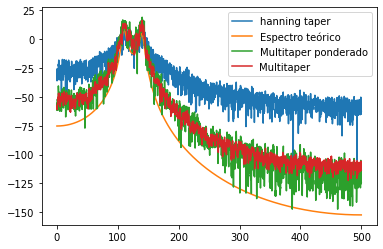

In [342]:
def fftmultitaper(data, srate, bw):
    from scipy.signal.windows import dpss
    # define Slepian tapers.
    n=len(data)
    sigma2=np.var(data)
    ntap=bw*2-1
    tapers, eigvals = dpss(n, bw, ntap, return_ratios=True)
    
    # initialize multitaper power matrix
    mtPow = np.zeros((n//2+1))
    hz = np.linspace(0,srate/2, n//2+1);
    dcum=np.zeros((len(hz)))
    # loop through tapers
    for tapi in range (np.size(tapers,axis=0)-1):# % -1 because the last taper is typically not used

        # scale the taper for interpretable FFT result
        temptaper = tapers[tapi,:]/np.max(tapers[tapi,:]);

        # FFT of tapered data
        x = abs(2*fft.fft(data*temptaper)/n)**2;
        x=x[0:len(hz)]
        d=np.sqrt(eigvals[tapi])*x/(eigvals[tapi]*x-(1-eigvals[tapi])*sigma2)
        dcum+=d**2
        # add this spectral estimate to the total power estimate
        mtPow[:]+= x*(d**2)
    # Because the power spectra were summed over many tapers,
    # divide by the number of tapers to get the average.
    return mtPow[:]/dcum
f=np.linspace(0, fsamp/2, n//2 +1)
plt.plot(f, 10*np.log10(np.abs(2*senalX/n)**2), label="hanning taper")
plt.plot(f,  5*LPX-100, label="Espectro teórico")
snalX2=fftmultitaper(senal-np.mean(senal), fsamp, 4);
plt.plot(f, 10*np.log10(np.abs(snalX2)**2), label="Multitaper ponderado")
plt.plot(f, 10*np.log10(np.abs(snalX)**2), label="Multitaper")

#plt.xlim([0,200])
plt.legend(loc="best")

# Filtrado de una señal

Filtros con respuesta finita al  impulso FIR.

Usaremos el método conocido como diseño de ventana. Este método hace uso de la convolución en tiempo (producto Hadamard en el espacio de frecuencias) para amortiguar y anular las frecuencias indeseadas. 

## Filtro pasa altas


Generemos primero una señal y observemos su espectro para ver el funcionamiento de este tipo de filtros.

Text(0, 0.5, 'Potencia [Hz]')

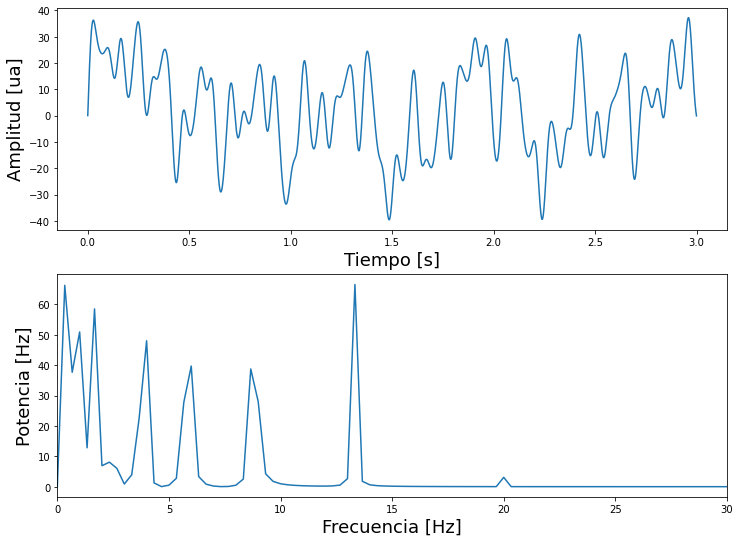

In [4]:
# Generación de la señal
srate=1000                                          # Frecuencia de muestreo
t=np.arange(0, 3, 1/srate)                          # Creación de vector de tiempos
n= len(t)                                           # Longitud de la señal
frec=np.logspace(np.log10(0.5), np.log10(20), 10)   # Creación de frecuencias de interés.
amp=10*np.random.rand(len(frec))                    # Generación de las amplitudes por frecuencia

senal=np.zeros((n), dtype=np.float32)               # Generación del vector que almacenará la señal
for f in range(len(frec)):
    senal+=amp[f]*np.sin(2*np.pi*frec[f]*t)
    
## Obtención del espectro de potencia 
senAv=np.mean(senal)
senalXX=fft.rfft(senal - senAv)
senalX=(2*np.abs(senalXX)/n)**2 # Espectro de potencia
hz=np.linspace(0, srate/2, n//2 + 1 )                    # Vector de frecuencias
fig, ax=plt.subplots(2, 1, figsize=(12, 9))
ax[0].plot(t, senal)
ax[1].plot(hz, senalX)
ax[1].set_xlim([0, np.max(frec) + 10])
ax[0].set_xlabel("Tiempo [s]", fontsize=18)
ax[1].set_xlabel("Frecuencia [Hz]", fontsize=18)
ax[0].set_ylabel("Amplitud [ua]", fontsize=18)
ax[1].set_ylabel("Potencia [Hz]", fontsize=18)

# Generación del filtro pasa altas.

Para generar el filtro diseñaremos primero un kernel sigmoidal, este kernel deberá saturarse en el rango de frecuencias que se quieren mantener y anularse en el rango de frecuencias que se quieren anular. EL kernel sigmoidal permitirá mantener una transición suave.

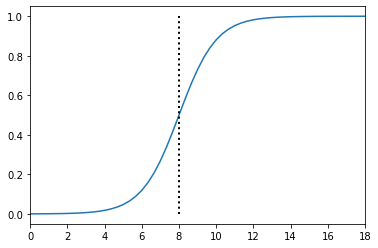

<Figure size 432x288 with 0 Axes>

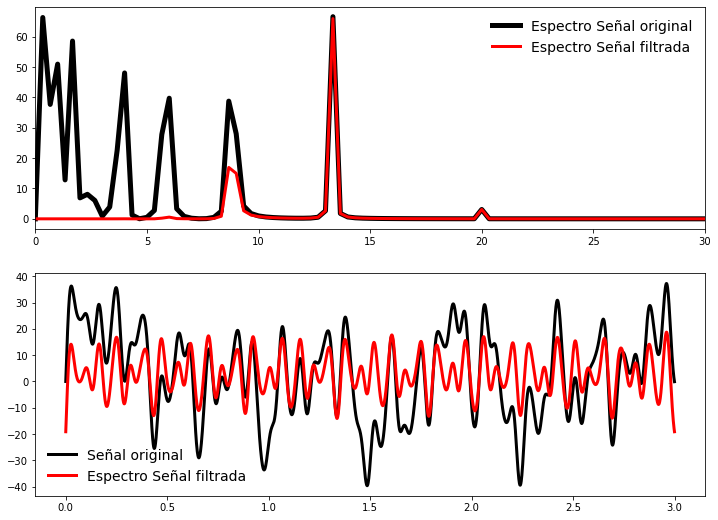

In [5]:
fcut=8                                            # Frecuencia de corte, de 7 hacia arriba haremos cero.
filterkernel=1/(1 + np.exp(-hz + fcut))
plt.plot(hz, filterkernel)
plt.xlim([0, fcut+10])
plt.plot([fcut, fcut], [0, 1], c="k", ls=":", lw=2)

# Filtrado
senalXFilt=senalXX*filterkernel        # Producto entre el espectro de la señal y el kernel
plt.figure()
fig, ax=plt.subplots(2, 1, figsize=(12, 9))
ax[0].plot(hz, senalX, c="k", lw=5, label="Espectro Señal original")
ax[0].plot(hz, np.abs(2*senalXFilt/n)**2, c="red", lw=3, label="Espectro Señal filtrada")
ax[0].set_xlim([0, 30])

# Ahora pasamos al dominio del tiempo
senalFilt=fft.irfft(senalXFilt)+ senAv
ax[1].plot(t, senal, c="k", lw=3, label="Señal original")
ax[1].plot(t, senalFilt, c="red", lw=3, label="Espectro Señal filtrada")
ax[0].legend(loc="best", fontsize=14, frameon=False)
ax[1].legend(loc="best", fontsize=14, frameon=False)

#ax[1].set_xlim([0, 30])

## De manera similar, podemos generar un filtro pasa bajas

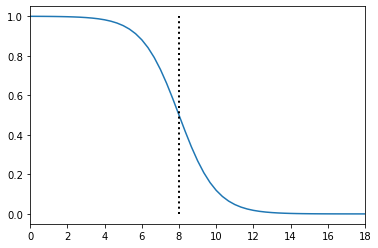

<Figure size 432x288 with 0 Axes>

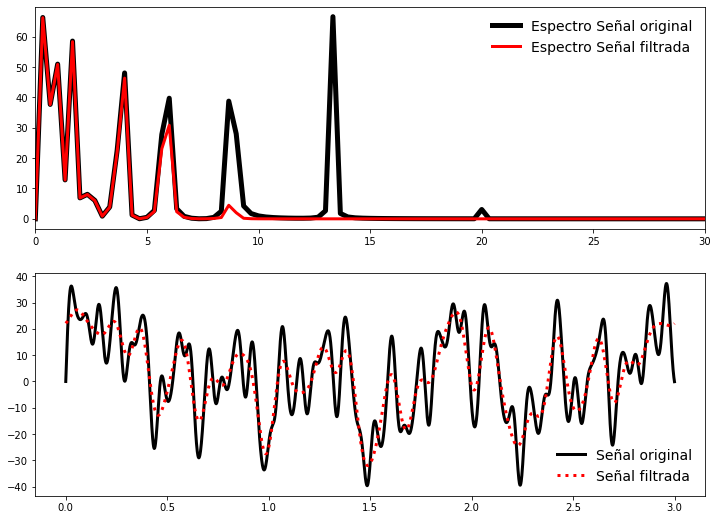

In [6]:
fcut=8          # Frecuencia de corte, de 7 hacia arriba haremos cero.
filterkernel=1/(1 + np.exp(hz - fcut))
plt.plot(hz, filterkernel)
plt.xlim([0, fcut + 10])
plt.plot([fcut, fcut], [0, 1], c="k", ls=":", lw=2)

# Filtrado
senalXFilt=senalXX*filterkernel  # Producto entre el espectro de la señal y el kernel
plt.figure()
fig, ax=plt.subplots(2, 1, figsize=(12, 9))
ax[0].plot(hz, senalX, c="k", lw=5, label="Espectro Señal original")
ax[0].plot(hz, np.abs(2*senalXFilt/n)**2, c="red", lw=3, label="Espectro Señal filtrada")
ax[0].set_xlim([0, 30])

# Ahora pasamos al dominio del tiempo
senalFilt=fft.irfft(senalXFilt)+ senAv
ax[1].plot(t, senal, c="k", lw=3, label="Señal original")
ax[1].plot(t, senalFilt, c="red", lw=3, ls=":", label="Señal filtrada")
ax[0].legend(loc="best", fontsize=14, frameon=False)
ax[1].legend(loc="best", fontsize=14, frameon=False)

#ax[1].set_xlim([0, 30])

## Filtros pasa banda.

La idea de este tipo de filtros es la de fusionar filtros pasa altas y pasabajas con el fín de mantener un rango intermedio de frecuencias.

Un filtro pasa banda perfecto o ideal podría contener efectos de frontera debido a la rápida atennuación de las frecuencias "indeseadas", por ello se suelen mantener zonas de transición que permitan suavizar estos cambios drásticos. 

En este caso, uno de los métodos más utilizados consiste en generar un kernel adecuado mediante el método de mínimos cuadrados. Para ello haremos uso de la función ***firls*** de la paqueteria de *scipy.signal*

In [ ]:
help(sn.firls)

751
[0.     0.0064 0.008  0.016  0.0192 1.    ]
La longitud de la señal es:  3000 La longitud de los pesos es:  2253


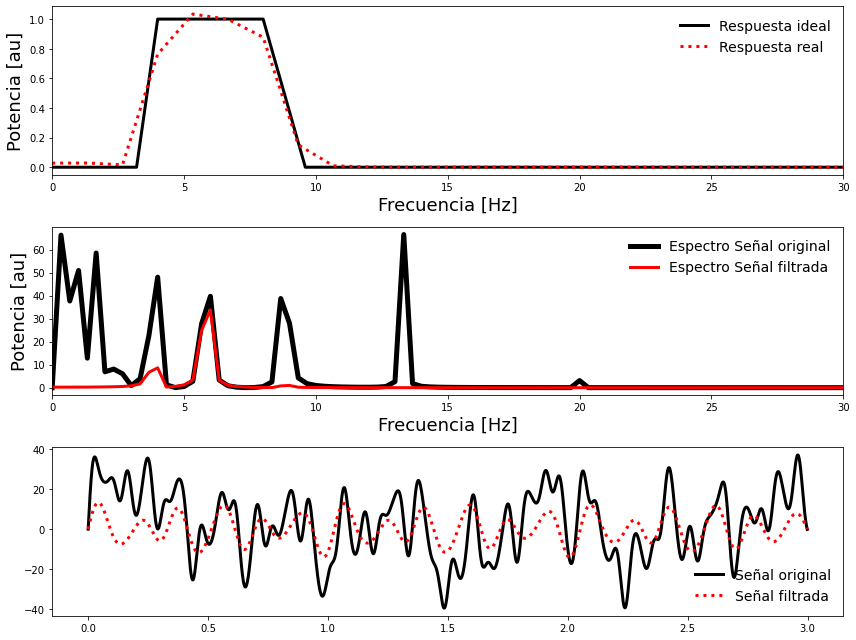

In [7]:
srate=1000
nyquist=srate/2
band=[4, 8]
twid=0.2            #Zona de transición
filt0=np.int32(np.round(3*(srate/band[0]), decimals=0))+1
print(filt0)
freqs=np.array([0, (1-twid)*band[0], band[0], band[1], (1+ twid)*band[1], nyquist])/nyquist
print(freqs)
idealresponse=[0, 0, 1, 1, 0, 0]
filterweights=sn.firls(filt0, freqs, idealresponse)
print("La longitud de la señal es: ", len(senal), "La longitud de los pesos es: ", 3*len(filterweights))
senalFilt=sn.filtfilt(filterweights, 1, senal, padlen=3 * len(filterweights))                   # Filtrado de la señal
# Ahora graficamos
fig, ax=plt.subplots(3, 1, figsize=(12, 9))
# Respuesta ideal vs respuesta real del filtro
ax[0].plot(freqs*nyquist, idealresponse, c='k', label="Respuesta ideal", lw=3)
filterX=fft.fft(filterweights)
frqs2=np.linspace(0, nyquist, np.int32(np.floor(filt0/2)) + 1)
ax[0].plot(frqs2, np.abs(filterX[0:len(frqs2)]), c='red', ls=":", label="Respuesta real", lw=3)
ax[0].set_xlabel("Frecuencia [Hz]", fontsize=18)
ax[0].set_ylabel("Potencia [au]", fontsize=18)
# Espectro de la señal filtrada y la original
senalFiltX=fft.rfft(senalFilt)                    
ax[1].plot(hz, senalX, c="k", lw=5, label="Espectro Señal original")
ax[1].plot(hz, np.abs(2*senalFiltX/n)**2, c="red", lw=3, label="Espectro Señal filtrada")
ax[1].set_xlim([0, 30])
ax[0].set_xlim([0, 30])

ax[1].set_xlabel("Frecuencia [Hz]", fontsize=18)
ax[1].set_ylabel("Potencia [au]", fontsize=18)

ax[2].plot(t, senal, c="k", lw=3, label="Señal original")
ax[2].plot(t, senalFilt, c="red", lw=3, ls=":", label="Señal filtrada")
ax[1].legend(loc="best", fontsize=14, frameon=False)
ax[2].legend(loc="best", fontsize=14, frameon=False)
ax[0].legend(loc="best", fontsize=14, frameon=False)
plt.tight_layout()


In [3]:

# Programa para el análisis de tiempo frecuencia de las señales LFP.
import numpy as np
import scipy.fft as fft
import scipy.signal as sn
import matplotlib.pyplot as plt
import lfpy as lfp
#------------------------------------------------------------------------------
#------------------------------------------------------------------------------
#                                     Parámetros intercambiables del script
monkey=33                           # Mon, solo 32 o 33
serie=91                           # Serie o día de registro
orden=2                             # Orden del set. 2 es Unc en RR032
area="S1"                           # Area de registro
lti=1.5                             # Tiempo de corte hacia atrás

fsamp=2000                          # La frecuencia de muestreo es de 2khz
duracion=4.5                        # Tiempo en s
longitud=np.int32(duracion*fsamp)   # Tiempo en núm de puntos
nelec=7                             # Número de electrodos
widthtf=0.5                         # Ancho de las ventanas en el espectrograma
#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

if area=="S1":
    patharea="S1_izq_MAT"
elif area=="A1":    
    patharea="A1_izq_MAT"
else:
    raise ValueError("Hasta el momento solo se está trabajando con las áreas S1 y A1")
    
if monkey==33:
    path="/home/sparra/AENHA/LFP33/LFP_RR033/%s"%(patharea)
    pathcomp="/home/sparra/AENHA/Database_RR033"
    namedir="RR033"
    if serie<100:
        name="RR0330%d_00%d"%(serie, orden)
    elif serie<10:
        name="RR03300%d_00%d"%(serie, orden)
    else:
        name="RR033%d_00%d"%(serie, orden)
elif monkey==32:
    path="/home/sparra/AENHA/LFP32/%s"%(patharea)
    pathcomp="/home/sparra/AENHA/BaseDatosKarlitosNatsushiRR032"
    namedir="RR032"
    if serie<100:
        name="RR0320%d_00%d"%(serie, orden)
    elif serie<10:
        name="RR03200%d_00%d"%(serie, orden)
    else:
        name="RR032%d_00%d"%(serie, orden)
        
else:
    raise ValueError("Valor incorrecto, solo es posible trabajar con los datos del mono 32 y 33")
#------------------------------------------------------------------------------
#------------------------------------------------------------------------------
# Carga un archivo de prueba
file="%s/%s"%(path, name)
#file="/run/media/sparra/AENHA/LFP33/S1_izq_MAT/RR033075_001"
if (monkey==32 or monkey==33) and area=="S1":
    datalfp=lfp.loadlfp(file)
elif (monkey==32 or monkey==33) and area=="A1":
    datalfp, _=lfp.loadnsx(file)
else:
    raise ValueError("Monkey or area not supported.")
ntrials=len(datalfp)                # Número de ensayos en la sesión
print("Se cargó el archivo: ", file)

Se cargó el archivo:  /home/sparra/AENHA/LFP33/LFP_RR033/S1_izq_MAT/RR033091_002


Text(0, 0.5, 'Potencia [\\mu V/Hz]')

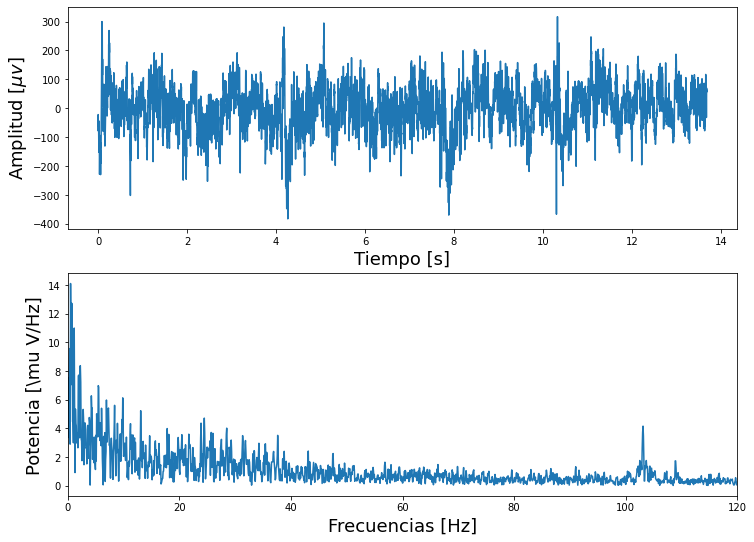

In [4]:
#
#
# Extracción de un ensayo y su graficación
#
#
#
#
trial=10       # Ensayo 1
elec=0        # Electrodo 1
t=np.arange(0,  len(datalfp[trial][:, elec])/2000  ,1/2000)

fig, ax=plt.subplots(2, 1, figsize=(12, 9))
ax[0].plot(t, datalfp[trial][:, elec])

ax[0].set_xlabel("Tiempo [s]", fontsize=18)
ax[0].set_ylabel("Amplitud [$\mu v$]", fontsize=18)

# Espectro de potencia
senal=datalfp[trial][:, elec]- np.mean(datalfp[trial][:, elec])
n=len(senal)
senalX=fft.rfft(senal*np.hamming(n))
hz=np.linspace(0, 1000, len(senal)//2 +1)

ax[1].plot(hz, np.abs(2*senalX/n))
ax[1].set_xlim([0, 120])
ax[1].set_xlabel("Frecuencias [Hz]", fontsize=18)
ax[1].set_ylabel("Potencia [\mu V/Hz]", fontsize=18)

## Filtrado de la señal (segundo método: uso de las librerías de scipy)

Usaremos las siguientes funciones:
* firwin(orden, frecuencia de corte)

   * orden: Es el número de puntos + 1 que se usarán. Normalmente se espera que sea de 3 a 8 veces la frecuencia de corte.
   * frecuencia de corte: Frecuencia máxima permitida, normalizada con respecto a la frecuencia de nyquist



* filtfilt

* iirnotch

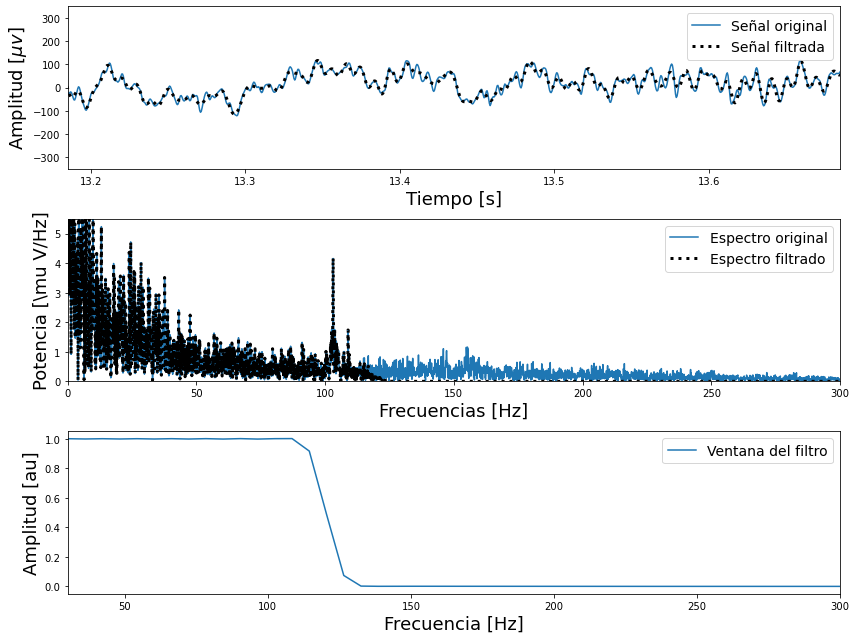

In [124]:
fsamp=2000                       # Frecuencia de muestreo en hz
fcut=120                         # Frecuencia de corte para el filtro pasabajas (La zona de transición es de aprox 30)
tam=20                           # Variable para fijar el orden (tam ciclos de la frecuencia de corte)
orden=np.int32(tam/fcut*fsamp)   # Orden del filtro
b=sn.firwin(orden, 2*fcut/fsamp)


# Filtado de la señal
senalF=datalfp[trial][:, elec]    #  Preparación de la señal para su filtrado
nor=len(senalF)
senalF=np.concatenate((np.flip(senalF),senalF, np.flip(senalF)) )
senalF=sn.filtfilt(b, 1, senalF)
senalF=senalF[nor:-1-nor+1]                      

fig, ax=plt.subplots(3, 1, figsize=(12, 9))
ax[0].plot(t, datalfp[trial][:, elec], label="Señal original")
ax[0].plot(t, senalF, c="k", ls=":", lw=3, label="Señal filtrada")
ax[0].set_xlim([t[-1]-0.5, t[-1]])
ax[0].set_ylim([-350, 350])
ax[0].set_xlabel("Tiempo [s]", fontsize=18)
ax[0].set_ylabel("Amplitud [$\mu v$]", fontsize=18)

# Espectro de potencia
senal=datalfp[trial][:, elec]- np.mean(datalfp[trial][:, elec])
senalX=fft.rfft(senal*np.hamming(n))
hz=np.linspace(0, 1000, len(senal)//2 +1)
# Espectro de señal filtrada
senalFX=fft.rfft((senalF-np.mean(senalF))*np.hamming(n))


ax[1].plot(hz, np.abs(2*senalX/n), label="Espectro original")
ax[1].plot(hz, np.abs(2*senalFX/n), label="Espectro filtrado", c="k", ls=":", lw=3)

ax[1].set_xlim([0, 300])
ax[1].set_xlabel("Frecuencias [Hz]", fontsize=18)
ax[1].set_ylabel("Potencia [\mu V/Hz]", fontsize=18)
ax[0].legend(loc="best", fontsize=14)
ax[1].legend(loc="best", fontsize=14)

#ax[1].set_xlim([50, 120])
ax[1].set_ylim([0, 5.5])



# Ahora veamos el filtro
filterX=fft.fft(b)
frqs2=np.linspace(0, 1000, np.int32(np.floor(orden/2)) + 1)
ax[2].plot(frqs2, np.abs(filterX[0: len(frqs2)]), label="Ventana del filtro")
ax[2].set_xlim([30, 300])
ax[2].set_xlabel("Frecuencia [Hz]", fontsize=18)
ax[2].set_ylabel("Amplitud [au]", fontsize=18)
ax[2].legend(loc="best", fontsize=14)

plt.tight_layout()


# Ahora lo que tenemos que hacer es comparar con el filtro ideal

## Ahora a remover el ruido de linea (frec a  60 hz) filtro notch

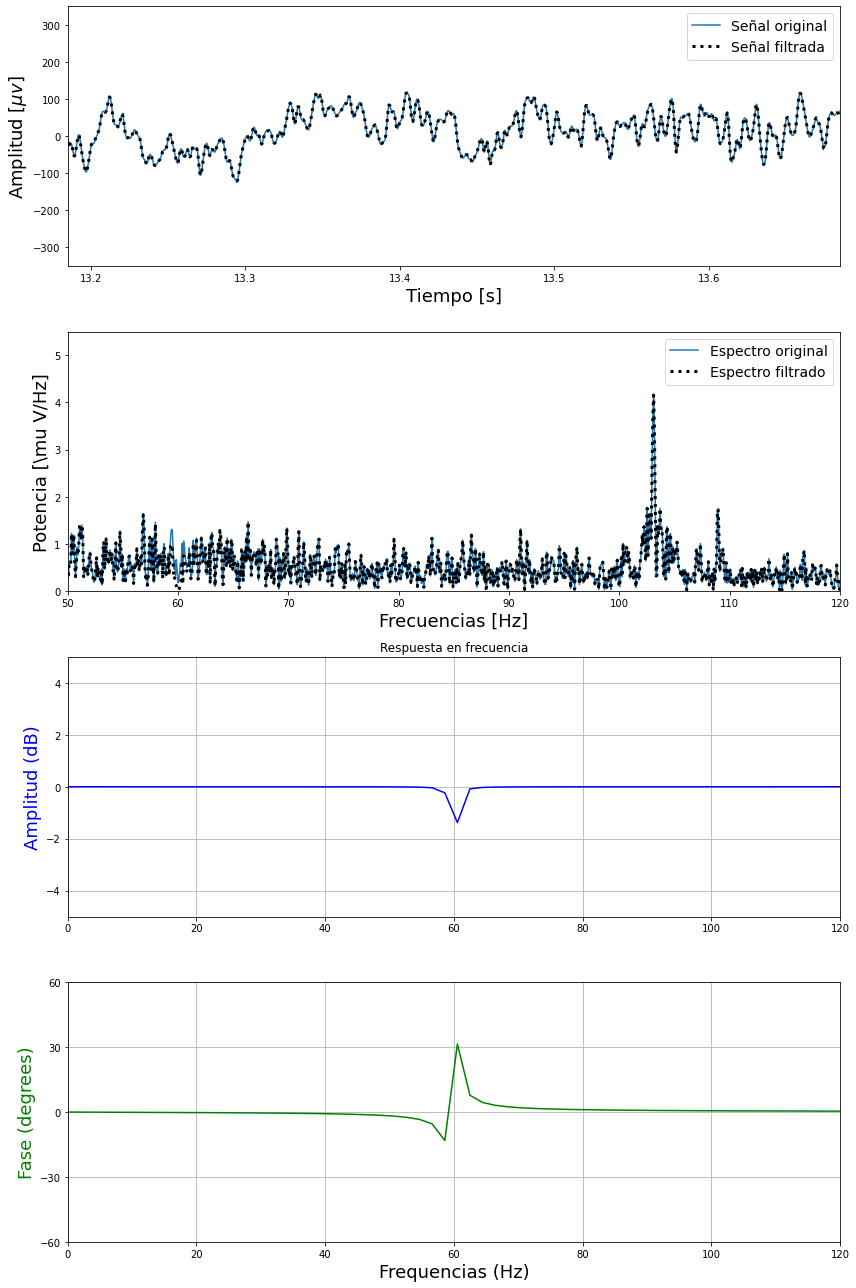

In [5]:
nyquist=1000
band=60/nyquist             # Frecuencia a remover normalizada
Q=90                        # Factor de calidad
b, a = sn.iirnotch(band, Q)

senalF=datalfp[trial][:, elec]         #Preparación de la señal para su filtrado
nor=len(senalF)
senalF=np.concatenate((np.flip(senalF),senalF, np.flip(senalF)) )
senalF=sn.filtfilt(b, a, senalF)
senalF=senalF[nor:-1-nor+1]                      

fig, ax=plt.subplots(4, 1, figsize=(12, 9*2))
ax[0].plot(t, datalfp[trial][:, elec], label="Señal original")
ax[0].plot(t, senalF, c="k", ls=":", lw=3, label="Señal filtrada")
ax[0].set_xlim([t[-1]-0.5, t[-1]])
ax[0].set_ylim([-350, 350])
ax[0].set_xlabel("Tiempo [s]", fontsize=18)
ax[0].set_ylabel("Amplitud [$\mu v$]", fontsize=18)

# Espectro de potencia
senal=datalfp[trial][:, elec]- np.mean(datalfp[trial][:, elec])
senalX=fft.rfft(senal*np.hamming(n))
hz=np.linspace(0, 1000, len(senal)//2 +1)
# Espectro de señal filtrada
senalFX=fft.rfft((senalF-np.mean(senalF))*np.hamming(n))


ax[1].plot(hz, np.abs(2*senalX/n), label="Espectro original")
ax[1].plot(hz, np.abs(2*senalFX/n), label="Espectro filtrado", c="k", ls=":", lw=3)

ax[1].set_xlim([0, 300])
ax[1].set_xlabel("Frecuencias [Hz]", fontsize=18)
ax[1].set_ylabel("Potencia [\mu V/Hz]", fontsize=18)
ax[0].legend(loc="best", fontsize=14)
ax[1].legend(loc="best", fontsize=14)

ax[1].set_xlim([50, 120])
ax[1].set_ylim([0, 5.5])

# Respuesta en frecuencia 
w, h = sn.freqz(b, a)
freq = w*2000/(2*np.pi)
ax[2].plot(freq, 20*np.log10(abs(h)), color='blue')
ax[2].set_title("Respuesta en frecuencia")
ax[2].set_ylabel("Amplitud (dB)", color='blue', fontsize=18)
ax[2].set_xlim([0, 120])
ax[2].set_ylim([-5, 5])
ax[2].grid()
ax[3].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[3].set_ylabel("Fase (degrees)", color='green', fontsize=18)
ax[3].set_xlabel("Frequencias (Hz)", fontsize=18)
ax[3].set_xlim([0, 120])
ax[3].set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax[3].set_ylim([-60, 60])
ax[3].grid()
plt.tight_layout()

 Ahora continuamos con los filtros pasabanda para mantener un segmento de análisis según la información mutua de la amplitud y la fase, o amplitud y potencia

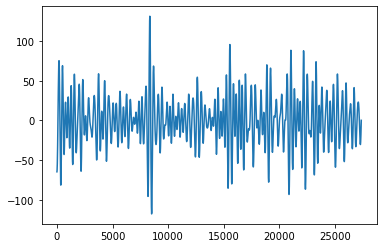

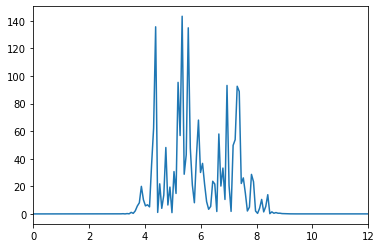

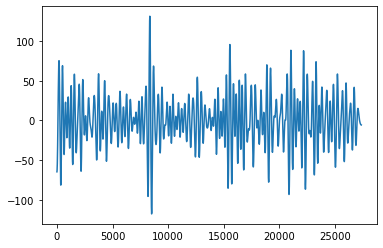

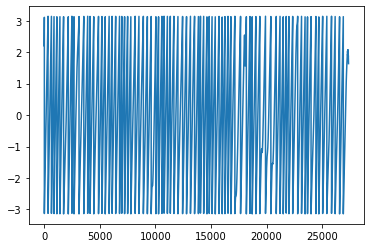

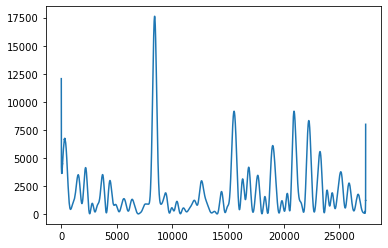

In [51]:
band=[4, 8]         # Extremos para el filtrado 
nyquist=fsamp/2     # Definición de la frecuencia de Nyquist
twid=0.2            #Zona de transición
filt0=np.int32(np.round(3*(fsamp/band[0]), decimals=0))+1   # Orden del filtro (número de puntos a usar)
#print(filt0)
freqs=np.array([0, (1-twid)*band[0], band[0], band[1], (1+ twid)*band[1], nyquist])/nyquist
#print(freqs)
idealresponse=[0, 0, 1, 1, 0, 0]
filterweights=sn.firls(filt0, freqs, idealresponse)
#
lsen=len(senalF)
senalEx=np.concatenate((np.flip(senalF), senalF, np.flip(senalF) ))
senalFilt=sn.filtfilt(filterweights, 1, senalEx, padlen=3 * len(filterweights))                   # Filtrado de la señal
plt.figure()
plt.plot(np.flip(senalFilt[0: lsen]))
#plt.xlim([0, lsen])
senalFilt=senalFilt[lsen:-1-lsen+1]
senalFiltX=fft.rfft(senalFilt)
hz=np.linspace(0, nyquist, len(senalFilt)//2 + 1)
plt.figure()
plt.plot(hz, (np.abs(senalFiltX)*2/len(senalFilt))**2)
plt.xlim([0, 12])
plt.figure()
plt.plot(senalFilt)

senalFiltAn=sn.hilbert(senalFilt-np.mean(senalFilt))
anglesenalFiltAn=np.angle(senalFiltAn)
envelopesenalFiltAn=np.abs(senalFiltAn)
#plt.plot(envelopesenalFiltAn)
plt.figure()
plt.plot(anglesenalFiltAn)
plt.figure()
plt.plot(envelopesenalFiltAn**2)

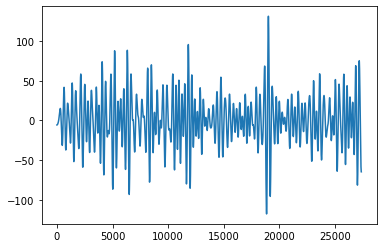

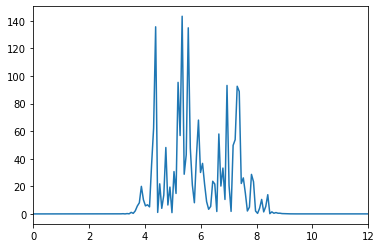

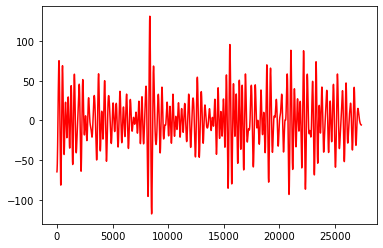

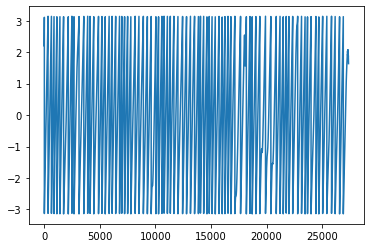

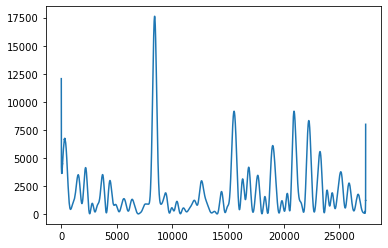

In [52]:
band=[4, 8]         # Extremos para el filtrado 
nyquist=fsamp/2     # Definición de la frecuencia de Nyquist
twid=0.0001          #Zona de transición
filt0=np.int32(np.round(8*(fsamp/band[0]), decimals=0))+1   # Orden del filtro (número de puntos a usar)
#print(filt0)
freqs=np.array([0, (1-twid)*band[0], band[0], band[1], (1+ twid)*band[1], nyquist])/nyquist
#print(freqs)
idealresponse=[0, 0, 1, 1, 0, 0]
filterweights=sn.firls(filt0, freqs, idealresponse)
#
lsen=len(senalF)
senalEx=np.concatenate((np.flip(senalF), senalF, np.flip(senalF) ))
senalFilt2=sn.filtfilt(filterweights, 1, senalEx, padlen=8 * len(filterweights))                   # Filtrado de la señal
plt.figure()
plt.plot(np.flip(senalFilt[0: lsen]))
#plt.xlim([0, lsen])
senalFilt2=senalFilt[lsen:-1-lsen+1]

senalFiltX2=fft.rfft(senalFilt)
hz=np.linspace(0, nyquist, len(senalFilt)//2 + 1)
plt.figure()
plt.plot(hz, (np.abs(senalFiltX)*2/len(senalFilt))**2)
plt.xlim([0, 12])
plt.figure()
plt.plot(senalFilt2)
plt.plot(senalFilt, c="r")


senalFilt2An=sn.hilbert(senalFilt-np.mean(senalFilt))
anglesenalFilt2An=np.angle(senalFiltAn)
envelopesenalFilt2An=np.abs(senalFiltAn)
#plt.plot(envelopesenalFiltAn)
plt.figure()
plt.plot(anglesenalFiltAn)
plt.figure()
plt.plot(envelopesenalFiltAn**2)

## Las transiciones rápidas pueden lograrse debido a la concatenación de la señal. Efectos de borde no apreciables

In [57]:
len(datalfp)

150